In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:
df = pd.read_csv('ironOreQuality.csv', decimal = ',',parse_dates = ['date'] )
df

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,...,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
737449,2017-09-09 23:00:00,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,...,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
737450,2017-09-09 23:00:00,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71
737451,2017-09-09 23:00:00,49.75,23.20,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71


In [10]:
#let us find the % concentration of Silica
df['% Silica Concentrate'].mean()

2.326763251352968

In [11]:
#max % of iron 
df['% Iron Concentrate'].max()

68.01

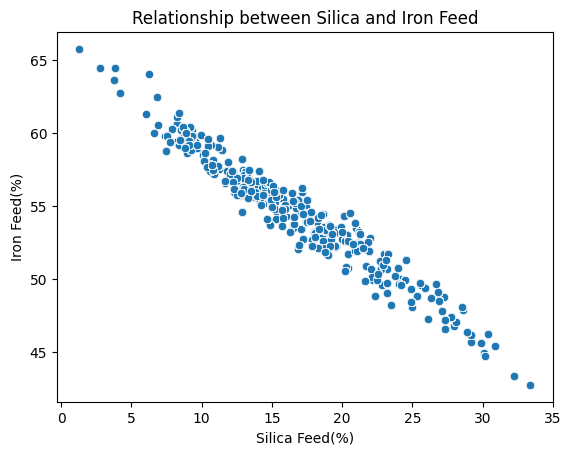

In [13]:
sns.scatterplot(x='% Silica Feed', y='% Iron Feed', data=df)
plt.xlabel('Silica Feed(%)')
plt.ylabel('Iron Feed(%)')
plt.title('Relationship between Silica and Iron Feed')
plt.show()

In [14]:
#We see they are perfectly inversely correlated. That means when Iron feed(%) goes down, 
#the percentage of silica feed goes up.

In [15]:
df_iron = df.drop(columns = ['date', '% Silica Concentrate'])
df_iron_target = df['% Silica Concentrate']

In [16]:
df_iron = np.array(df_iron)
df_iron_target = np.array(df_iron_target)

In [18]:
#reshaping the array
df_iron_target = df_iron_target.reshape(-1,1)
df_iron_target.shape

(737453, 1)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_iron, df_iron_target, test_size=0.2)
X_train.shape, X_test.shape

((589962, 22), (147491, 22))

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
#Baselining with Linear Regression Model

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [23]:
linearRegression_model = LinearRegression()
linearRegression_model.fit(X_train_scaled, Y_train)

LinearRegression()

In [25]:
accuracy = linearRegression_model.score(X_test_scaled, Y_test)
accuracy

0.6810853258626868

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=-1)
rf_model.fit(X_train_scaled, Y_train)

C:\Users\NARESH KUMAR SAW\AppData\Local\Temp\ipykernel_18540\3105184180.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train_scaled, Y_train)


RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1)

In [28]:
rf_model.score(X_test_scaled, Y_test)

0.8837032633242217